In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('E:\\working_DATA\\Bengaluru_House_Data.csv')

In [3]:
df.sample(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10259,Super built-up Area,Ready To Move,Banashankari,3 BHK,Bregae,1800,3.0,2.0,175.0
946,Plot Area,Ready To Move,Kammanahalli,4 Bedroom,NaN,1080,3.0,1.0,155.0
11545,Plot Area,Ready To Move,Whitefield,4 Bedroom,Pronege,4800,4.0,3.0,550.0
7619,Built-up Area,17-Mar,Meenakunte,3 Bedroom,Sreat R,3200,3.0,0.0,260.0


In [4]:
df=df.drop(columns=['availability','society','location'])

In [5]:
df

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,4 BHK,4689,4.0,1.0,488.00


# Data cleaning

In [6]:
df.isnull().sum()

area_type       0
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
med=df['bath'].median()
med

2.0

In [8]:
df['bath']=df['bath'].fillna(med)
df.isnull().sum()

area_type       0
size           16
total_sqft      0
bath            0
balcony       609
price           0
dtype: int64

In [9]:
medi=df['balcony'].median()
df['balcony']=df['balcony'].fillna(medi)
df.isnull().sum()

area_type      0
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [11]:
df=df[df['total_sqft'].str.isnumeric()]
df['total_sqft']=df['total_sqft'].astype('int')
df['bath']=df['bath'].astype('int')
df['balcony']=df['balcony'].astype('int')
df['price']=df['price'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12986 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   area_type   12986 non-null  object
 1   size        12978 non-null  object
 2   total_sqft  12986 non-null  int32 
 3   bath        12986 non-null  int32 
 4   balcony     12986 non-null  int32 
 5   price       12986 non-null  int32 
dtypes: int32(4), object(2)
memory usage: 507.3+ KB


C:\Users\dines\AppData\Local\Temp\ipykernel_8964\3262939862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft']=df['total_sqft'].astype('int')
C:\Users\dines\AppData\Local\Temp\ipykernel_8964\3262939862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath']=df['bath'].astype('int')
C:\Users\dines\AppData\Local\Temp\ipykernel_8964\3262939862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [12]:
df=df.dropna()
df.isnull().sum()

area_type     0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
df.shape

(12978, 6)

# Data Spliting

In [14]:
X=df.drop(columns=['price'])
y=df['price']

X.head()

,area_type,size,total_sqft,bath,balcony
0,Super built-up Area,2 BHK,1056,2,1
1,Plot Area,4 Bedroom,2600,5,3
2,Built-up Area,3 BHK,1440,2,3
3,Super built-up Area,3 BHK,1521,3,1
4,Super built-up Area,2 BHK,1200,2,1


In [15]:
y

0         39
1        120
2         62
3         95
4         51
        ... 
13315    231
13316    400
13317     60
13318    488
13319     17
Name: price, Length: 12978, dtype: int32

# OneHot Encoding

In [16]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,total_sqft,bath,balcony,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,size_1 Bedroom,size_1 RK,size_10 BHK,size_10 Bedroom,...,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_7 Bedroom,size_8 BHK,size_8 Bedroom,size_9 BHK,size_9 Bedroom
0,1056,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600,5,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521,3,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
X_train

,total_sqft,bath,balcony,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,size_1 Bedroom,size_1 RK,size_10 BHK,size_10 Bedroom,...,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_7 Bedroom,size_8 BHK,size_8 Bedroom,size_9 BHK,size_9 Bedroom
10808,1161,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,1290,2,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4478,1280,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5757,2100,5,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3229,1300,3,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,827,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
730,1202,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10964,2100,3,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8598,1810,3,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling:--


# (a)RobustScaler

In [18]:
from sklearn.preprocessing import StandardScaler,Normalizer,RobustScaler,MaxAbsScaler
ns=RobustScaler()
ns.fit(X_train)
X_train_R_scaled=ns.transform(X_train)
X_test_R_scaled=ns.transform(X_test)

In [26]:
X_train_R_scaled

array([[-0.19292035,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03539823,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01769912,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.46902655,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.95575221,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.63716814,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [28]:
X_train_R_scaled=pd.DataFrame(X_train_R_scaled,columns=X_train.columns)
X_test_R_scaled=pd.DataFrame(X_test_R_scaled,columns=X_test.columns)

# (b)MinMaxScaler

In [19]:
from sklearn.preprocessing import StandardScaler,Normalizer,RobustScaler,MaxAbsScaler
ns=Normalizer()   #MinMaxScaler
ns.fit(X_train)
X_train_N_scaled=ns.transform(X_train)
X_test_N_scaled=ns.transform(X_test)

In [31]:
X_train_N_scaled

array([[9.99997403e-01, 1.72264841e-03, 8.61324206e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99996995e-01, 1.55038294e-03, 1.55038294e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99997864e-01, 1.56249666e-03, 7.81248331e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99998413e-01, 1.42856916e-03, 9.52379441e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99997711e-01, 1.65745477e-03, 1.10496985e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99995773e-01, 2.19779291e-03, 1.09889645e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [33]:
X_train_N_scaled=pd.DataFrame(X_train_N_scaled,columns=X_train.columns)
X_test_N_scaled=pd.DataFrame(X_test_N_scaled,columns=X_test.columns)

# (c)MaxAbsScaler

In [20]:
from sklearn.preprocessing import StandardScaler,Normalizer,RobustScaler,MaxAbsScaler
ns=MaxAbsScaler()
ns.fit(X_train)
X_train_M_scaled=ns.transform(X_train)
X_test_M_scaled=ns.transform(X_test)

In [32]:
X_train_M_scaled

array([[0.02221074, 0.05      , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.0246786 , 0.05      , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.0244873 , 0.05      , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04017447, 0.075     , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.03462657, 0.075     , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.01740894, 0.05      , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
X_train_M_scaled=pd.DataFrame(X_train_M_scaled,columns=X_train.columns)
X_test_M_scaled=pd.DataFrame(X_test_M_scaled,columns=X_test.columns)

# Ploting the all types of Normalised data to check the difference in distribution

<AxesSubplot:xlabel='bath', ylabel='Density'>

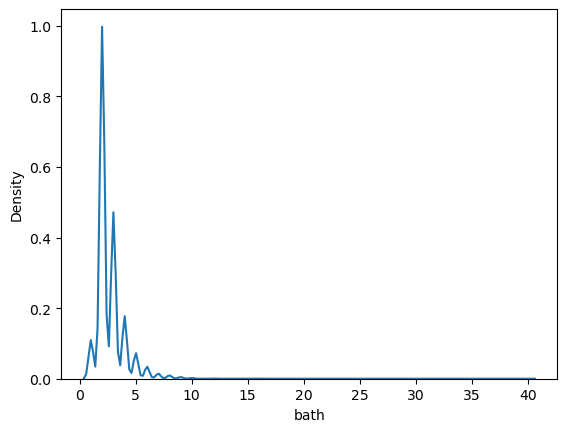

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(X_train['bath'])

<AxesSubplot:xlabel='bath', ylabel='Density'>

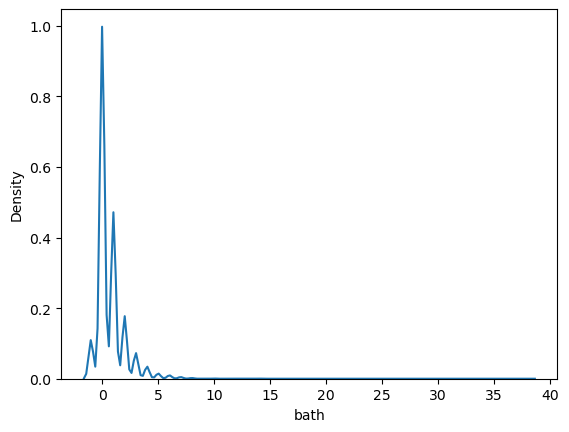

In [53]:
sns.kdeplot(X_train_R_scaled['bath'])

<AxesSubplot:xlabel='bath', ylabel='Density'>

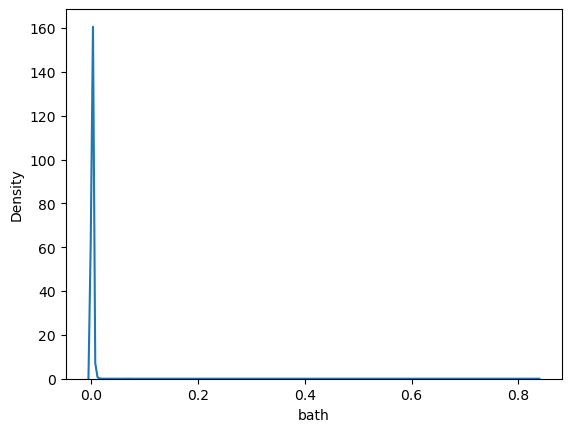

In [54]:
sns.kdeplot(X_train_N_scaled['bath'])

<AxesSubplot:xlabel='bath', ylabel='Density'>

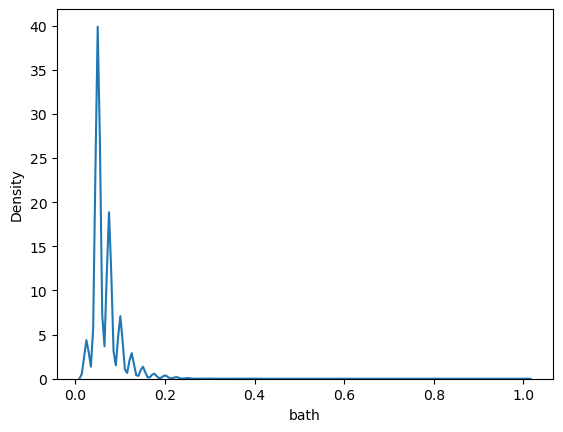

In [55]:
sns.kdeplot(X_train_M_scaled['bath'])